In [1]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

import matplotlib.pyplot as plt
import numpy    as np
import networkx as nx
import pandas   as pd

from collections import Counter, OrderedDict
from rdflib.namespace import XSD
from scipy.stats import binned_statistic
from scipy.interpolate import interp1d
from SPARQLWrapper import SPARQLWrapper, JSON, POST
from IPython.display import display, HTML

In [2]:
from rdflib.namespace import XSD
import pandas as pd 

DATATYPECONVERTERS = {
      str(XSD.integer):  int,
      str(XSD.decimal):  float,
      str(XSD.date):     lambda v: datetime.strptime(v, '%Y-%m-%d').date()
  }

def convertDatatype(obj):
    return DATATYPECONVERTERS.get(obj.get('datatype'), str)(obj.get('value')) 

def JSON2Pandas(results):
    res = results["results"]["bindings"]
    data = [dict([(k, convertDatatype(v)) for k,v in r.items()]) for r in res]
    return pd.DataFrame(data)

In [3]:
sparql = SPARQLWrapper("https://ldf.fi/yoma/sparql")
sparql.setQuery("""

PREFIX : <http://ldf.fi/schema/yoma/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX gvp:	<http://vocab.getty.edu/ontology#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX schema: <http://schema.org/>  
PREFIX skos:  <http://www.w3.org/2004/02/skos/core#>  
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> 

SELECT ?groupLbl (count(DISTINCT ?prs) AS ?no)
{  ?prs a :Person ;
    skos:prefLabel ?lbl ;
    :has_enrollment ?enr ;
    :has_event ?event .
  ?event :has_title ?title .
  ?title :related_occupation ?occ .
 
  ?occ skos:prefLabel ?occLbl .
  ?occ skos:broader ?occGroup .
  ?occGroup skos:broader ?upperGroup .
  ?upperGroup skos:prefLabel ?groupLbl .
  
  ?enr schema:date/gvp:estStart ?test .
  #?enr skos:broader ?year .
 
 
  

  
  FILTER (?test > "1799-12-31"^^xsd:date && ?test <="1809-12-31"^^xsd:date) 
  #FILTER (?test > "1809-12-31"^^xsd:date && ?test <"1819-12-31"^^xsd:date) 
  #FILTER (?test > "1819-12-31"^^xsd:date && ?test <"1829-12-31"^^xsd:date) 
  #FILTER (?test > "1829-12-31"^^xsd:date && ?test <"1839-12-31"^^xsd:date) 
  #FILTER (?test > "1839-12-31"^^xsd:date && ?test <"1849-12-31"^^xsd:date) 
  #FILTER (?test > "1849-12-31"^^xsd:date && ?test <"1859-12-31"^^xsd:date) 
  #FILTER (?test > "1859-12-31"^^xsd:date && ?test <"1869-12-31"^^xsd:date) 
  #FILTER (?test > "1869-12-31"^^xsd:date && ?test <"1879-12-31"^^xsd:date) 
  #FILTER (?test > "1879-12-31"^^xsd:date && ?test <"1889-12-31"^^xsd:date) 
  #FILTER (?test > "1889-12-31"^^xsd:date && ?test <"1899-12-31"^^xsd:date) 
  
  
  

  #?evt skos:prefLabel ?elabel ; schema:date/gvp:estStart ?date .

} 
group by ?groupLbl
ORDER BY DESC(?no)

""")

sparql.setReturnFormat(JSON)

results = sparql.query().convert()

res = results["results"]["bindings"]
print(f"{len(res)} results")

print(f"Datafields {results['head']['vars']}")

for ob in res[:5]:
    print(ob)
    
df1 = JSON2Pandas(results)
df1.set_index('groupLbl', inplace=True)
display(df1)

39 results
Datafields ['groupLbl', 'no']
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Uskonnon alanan kuluva työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '367'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Lainopillinen työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '250'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Sotilastyö'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '102'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Muu tilinpidollinen ja konttoritekninen työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '87'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Yhteiskunnallis-hallinnollinen työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '71'}}


,no
groupLbl,
Uskonnon alanan kuluva työ,367
Lainopillinen työ,250
Sotilastyö,102
Muu tilinpidollinen ja konttoritekninen työ,87
Yhteiskunnallis-hallinnollinen työ,71
Yliopistojen ja korkeakoulun opettajat,37
Muu teollinen työ,36
Aineopettajat ja lehtorit,31
Sihteeri- ja konekirjoitustyö,30


In [4]:
sparql = SPARQLWrapper("https://ldf.fi/yoma/sparql")
sparql.setQuery("""

PREFIX : <http://ldf.fi/schema/yoma/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX gvp:	<http://vocab.getty.edu/ontology#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX schema: <http://schema.org/>  
PREFIX skos:  <http://www.w3.org/2004/02/skos/core#>  
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> 

SELECT ?groupLbl (count(DISTINCT ?prs) AS ?no)
{  ?prs a :Person ;
    skos:prefLabel ?lbl ;
    :has_enrollment ?enr ;
    :has_event ?event .
  ?event :has_title ?title .
  ?title :related_occupation ?occ .
 
  ?occ skos:prefLabel ?occLbl .
  ?occ skos:broader ?occGroup .
  ?occGroup skos:broader ?upperGroup .
  ?upperGroup skos:prefLabel ?groupLbl .
  
  ?enr schema:date/gvp:estStart ?test .
  #?enr skos:broader ?year .
 
 
  

  
  FILTER (?test > "1809-12-31"^^xsd:date && ?test <"1819-12-31"^^xsd:date) 
  #FILTER (?test > "1819-12-31"^^xsd:date && ?test <"1829-12-31"^^xsd:date) 
  #FILTER (?test > "1829-12-31"^^xsd:date && ?test <"1839-12-31"^^xsd:date) 
  #FILTER (?test > "1839-12-31"^^xsd:date && ?test <"1849-12-31"^^xsd:date) 
  #FILTER (?test > "1849-12-31"^^xsd:date && ?test <"1859-12-31"^^xsd:date) 
  #FILTER (?test > "1859-12-31"^^xsd:date && ?test <"1869-12-31"^^xsd:date) 
  #FILTER (?test > "1869-12-31"^^xsd:date && ?test <"1879-12-31"^^xsd:date) 
  #FILTER (?test > "1879-12-31"^^xsd:date && ?test <"1889-12-31"^^xsd:date) 
  #FILTER (?test > "1889-12-31"^^xsd:date && ?test <"1899-12-31"^^xsd:date) 
  
  
  

  #?evt skos:prefLabel ?elabel ; schema:date/gvp:estStart ?date .

} 
group by ?groupLbl
ORDER BY DESC(?no)


""")

sparql.setReturnFormat(JSON)

results = sparql.query().convert()

res = results["results"]["bindings"]
print(f"{len(res)} results")

print(f"Datafields {results['head']['vars']}")

for ob in res[:5]:
    print(ob)
    
df2 = JSON2Pandas(results)
df2.set_index('groupLbl', inplace=True)
display(df2)

44 results
Datafields ['groupLbl', 'no']
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Uskonnon alanan kuluva työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '336'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Lainopillinen työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '313'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Yhteiskunnallis-hallinnollinen työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '148'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Muu tilinpidollinen ja konttoritekninen työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '132'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Sotilastyö'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '112'}}


,no
groupLbl,
Uskonnon alanan kuluva työ,336
Lainopillinen työ,313
Yhteiskunnallis-hallinnollinen työ,148
Muu tilinpidollinen ja konttoritekninen työ,132
Sotilastyö,112
Muu teollinen työ,84
Aineopettajat ja lehtorit,62
Sihteeri- ja konekirjoitustyö,49
"Kirjaston- ja arkistonhoitajat, museovirkamiehet",37


In [5]:
sparql = SPARQLWrapper("https://ldf.fi/yoma/sparql")
sparql.setQuery("""

PREFIX : <http://ldf.fi/schema/yoma/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX gvp:	<http://vocab.getty.edu/ontology#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX schema: <http://schema.org/>  
PREFIX skos:  <http://www.w3.org/2004/02/skos/core#>  
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> 

SELECT ?groupLbl (count(DISTINCT ?prs) AS ?no)
{  ?prs a :Person ;
    skos:prefLabel ?lbl ;
    :has_enrollment ?enr ;
    :has_event ?event .
  ?event :has_title ?title .
  ?title :related_occupation ?occ .
 
  ?occ skos:prefLabel ?occLbl .
  ?occ skos:broader ?occGroup .
  ?occGroup skos:broader ?upperGroup .
  ?upperGroup skos:prefLabel ?groupLbl .
  
  ?enr schema:date/gvp:estStart ?test .
  #?enr skos:broader ?year .
 
 
  

  
  FILTER (?test > "1819-12-31"^^xsd:date && ?test <"1829-12-31"^^xsd:date) 
  #FILTER (?test > "1829-12-31"^^xsd:date && ?test <"1839-12-31"^^xsd:date) 
  #FILTER (?test > "1839-12-31"^^xsd:date && ?test <"1849-12-31"^^xsd:date) 
  #FILTER (?test > "1849-12-31"^^xsd:date && ?test <"1859-12-31"^^xsd:date) 
  #FILTER (?test > "1859-12-31"^^xsd:date && ?test <"1869-12-31"^^xsd:date) 
  #FILTER (?test > "1869-12-31"^^xsd:date && ?test <"1879-12-31"^^xsd:date) 
  #FILTER (?test > "1879-12-31"^^xsd:date && ?test <"1889-12-31"^^xsd:date) 
  #FILTER (?test > "1889-12-31"^^xsd:date && ?test <"1899-12-31"^^xsd:date) 
  
  
  

  #?evt skos:prefLabel ?elabel ; schema:date/gvp:estStart ?date .

} 
group by ?groupLbl
ORDER BY DESC(?no)




""")

sparql.setReturnFormat(JSON)

results = sparql.query().convert()

res = results["results"]["bindings"]
print(f"{len(res)} results")

print(f"Datafields {results['head']['vars']}")

for ob in res[:5]:
    print(ob)
    
df3 = JSON2Pandas(results)
df3.set_index('groupLbl', inplace=True)
display(df3)


39 results
Datafields ['groupLbl', 'no']
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Uskonnon alanan kuluva työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '475'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Lainopillinen työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '236'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Tekniikan alaan kuuluva työnjohto- ja suoritustyö'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '119'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Yhteiskunnallis-hallinnollinen työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '113'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Muu tilinpidollinen ja konttoritekninen työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSche

,no
groupLbl,
Uskonnon alanan kuluva työ,475
Lainopillinen työ,236
Tekniikan alaan kuuluva työnjohto- ja suoritustyö,119
Yhteiskunnallis-hallinnollinen työ,113
Muu tilinpidollinen ja konttoritekninen työ,101
Sotilastyö,99
Aineopettajat ja lehtorit,94
Muu teollinen työ,83
"Kirjaston- ja arkistonhoitajat, museovirkamiehet",44


In [6]:
sparql = SPARQLWrapper("https://ldf.fi/yoma/sparql")
sparql.setQuery("""

PREFIX : <http://ldf.fi/schema/yoma/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX gvp:	<http://vocab.getty.edu/ontology#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX schema: <http://schema.org/>  
PREFIX skos:  <http://www.w3.org/2004/02/skos/core#>  
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> 

SELECT ?groupLbl (count(DISTINCT ?prs) AS ?no)
{  ?prs a :Person ;
    skos:prefLabel ?lbl ;
    :has_enrollment ?enr ;
    :has_event ?event .
  ?event :has_title ?title .
  ?title :related_occupation ?occ .
 
  ?occ skos:prefLabel ?occLbl .
  ?occ skos:broader ?occGroup .
  ?occGroup skos:broader ?upperGroup .
  ?upperGroup skos:prefLabel ?groupLbl .
  
  ?enr schema:date/gvp:estStart ?test .
  #?enr skos:broader ?year .
 
 
  

  
  FILTER (?test > "1829-12-31"^^xsd:date && ?test <"1839-12-31"^^xsd:date) 
  #FILTER (?test > "1839-12-31"^^xsd:date && ?test <"1849-12-31"^^xsd:date) 
  #FILTER (?test > "1849-12-31"^^xsd:date && ?test <"1859-12-31"^^xsd:date) 
  #FILTER (?test > "1859-12-31"^^xsd:date && ?test <"1869-12-31"^^xsd:date) 
  #FILTER (?test > "1869-12-31"^^xsd:date && ?test <"1879-12-31"^^xsd:date) 
  #FILTER (?test > "1879-12-31"^^xsd:date && ?test <"1889-12-31"^^xsd:date) 
  #FILTER (?test > "1889-12-31"^^xsd:date && ?test <"1899-12-31"^^xsd:date) 
  
  
  

  #?evt skos:prefLabel ?elabel ; schema:date/gvp:estStart ?date .

} 
group by ?groupLbl
ORDER BY DESC(?no)



""")

sparql.setReturnFormat(JSON)

results = sparql.query().convert()

res = results["results"]["bindings"]
print(f"{len(res)} results")

print(f"Datafields {results['head']['vars']}")

for ob in res[:5]:
    print(ob)
    
df4 = JSON2Pandas(results)
df4.set_index('groupLbl', inplace=True)
display(df4)


45 results
Datafields ['groupLbl', 'no']
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Uskonnon alanan kuluva työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '316'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Lainopillinen työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '218'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Yhteiskunnallis-hallinnollinen työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '126'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Muu tilinpidollinen ja konttoritekninen työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '124'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Aineopettajat ja lehtorit'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '1

,no
groupLbl,
Uskonnon alanan kuluva työ,316
Lainopillinen työ,218
Yhteiskunnallis-hallinnollinen työ,126
Muu tilinpidollinen ja konttoritekninen työ,124
Aineopettajat ja lehtorit,112
Muu teollinen työ,78
Tekniikan alaan kuuluva työnjohto- ja suoritustyö,69
Sotilastyö,64
Sihteeri- ja konekirjoitustyö,40


In [7]:
sparql = SPARQLWrapper("https://ldf.fi/yoma/sparql")
sparql.setQuery("""

PREFIX : <http://ldf.fi/schema/yoma/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX gvp:	<http://vocab.getty.edu/ontology#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX schema: <http://schema.org/>  
PREFIX skos:  <http://www.w3.org/2004/02/skos/core#>  
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> 

SELECT ?groupLbl (count(DISTINCT ?prs) AS ?no)
{  ?prs a :Person ;
    skos:prefLabel ?lbl ;
    :has_enrollment ?enr ;
    :has_event ?event .
  ?event :has_title ?title .
  ?title :related_occupation ?occ .
 
  ?occ skos:prefLabel ?occLbl .
  ?occ skos:broader ?occGroup .
  ?occGroup skos:broader ?upperGroup .
  ?upperGroup skos:prefLabel ?groupLbl .
  
  ?enr schema:date/gvp:estStart ?test .
  #?enr skos:broader ?year .
 
 
  

  
  FILTER (?test > "1839-12-31"^^xsd:date && ?test <"1849-12-31"^^xsd:date) 
  #FILTER (?test > "1849-12-31"^^xsd:date && ?test <"1859-12-31"^^xsd:date) 
  #FILTER (?test > "1859-12-31"^^xsd:date && ?test <"1869-12-31"^^xsd:date) 
  #FILTER (?test > "1869-12-31"^^xsd:date && ?test <"1879-12-31"^^xsd:date) 
  #FILTER (?test > "1879-12-31"^^xsd:date && ?test <"1889-12-31"^^xsd:date) 
  #FILTER (?test > "1889-12-31"^^xsd:date && ?test <"1899-12-31"^^xsd:date) 
  
  
  

  #?evt skos:prefLabel ?elabel ; schema:date/gvp:estStart ?date .

} 
group by ?groupLbl
ORDER BY DESC(?no)




""")

sparql.setReturnFormat(JSON)

results = sparql.query().convert()

res = results["results"]["bindings"]
print(f"{len(res)} results")

print(f"Datafields {results['head']['vars']}")

for ob in res[:5]:
    print(ob)
    
df5 = JSON2Pandas(results)
df5.set_index('groupLbl', inplace=True)
display(df5)


44 results
Datafields ['groupLbl', 'no']
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Uskonnon alanan kuluva työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '288'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Lainopillinen työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '238'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Yhteiskunnallis-hallinnollinen työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '167'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Aineopettajat ja lehtorit'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '161'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Muu tilinpidollinen ja konttoritekninen työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '1

,no
groupLbl,
Uskonnon alanan kuluva työ,288
Lainopillinen työ,238
Yhteiskunnallis-hallinnollinen työ,167
Aineopettajat ja lehtorit,161
Muu tilinpidollinen ja konttoritekninen työ,122
Muu teollinen työ,62
Sotilastyö,53
Sihteeri- ja konekirjoitustyö,40
Lääketieteellinen ja sairaanhoitotyö,36


In [8]:
sparql = SPARQLWrapper("https://ldf.fi/yoma/sparql")
sparql.setQuery("""



PREFIX : <http://ldf.fi/schema/yoma/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX gvp:	<http://vocab.getty.edu/ontology#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX schema: <http://schema.org/>  
PREFIX skos:  <http://www.w3.org/2004/02/skos/core#>  
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> 

SELECT ?groupLbl (count(DISTINCT ?prs) AS ?no)
{  ?prs a :Person ;
    skos:prefLabel ?lbl ;
    :has_enrollment ?enr ;
    :has_event ?event .
  ?event :has_title ?title .
  ?title :related_occupation ?occ .
 
  ?occ skos:prefLabel ?occLbl .
  ?occ skos:broader ?occGroup .
  ?occGroup skos:broader ?upperGroup .
  ?upperGroup skos:prefLabel ?groupLbl .
  
  ?enr schema:date/gvp:estStart ?test .
  #?enr skos:broader ?year .
 
 
  

  
  FILTER (?test > "1849-12-31"^^xsd:date && ?test <"1859-12-31"^^xsd:date) 
  #FILTER (?test > "1859-12-31"^^xsd:date && ?test <"1869-12-31"^^xsd:date) 
  #FILTER (?test > "1869-12-31"^^xsd:date && ?test <"1879-12-31"^^xsd:date) 
  #FILTER (?test > "1879-12-31"^^xsd:date && ?test <"1889-12-31"^^xsd:date) 
  #FILTER (?test > "1889-12-31"^^xsd:date && ?test <"1899-12-31"^^xsd:date) 
  
  
  

  #?evt skos:prefLabel ?elabel ; schema:date/gvp:estStart ?date .

} 
group by ?groupLbl
ORDER BY DESC(?no)



""")

sparql.setReturnFormat(JSON)

results = sparql.query().convert()

res = results["results"]["bindings"]
print(f"{len(res)} results")

print(f"Datafields {results['head']['vars']}")

for ob in res[:5]:
    print(ob)
    
df6 = JSON2Pandas(results)
df6.set_index('groupLbl', inplace=True)
display(df6)


51 results
Datafields ['groupLbl', 'no']
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Uskonnon alanan kuluva työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '194'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Yhteiskunnallis-hallinnollinen työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '154'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Aineopettajat ja lehtorit'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '107'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Lainopillinen työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '88'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Metsätaloustutkimus ja -neuvonta'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '55'}}


,no
groupLbl,
Uskonnon alanan kuluva työ,194
Yhteiskunnallis-hallinnollinen työ,154
Aineopettajat ja lehtorit,107
Lainopillinen työ,88
Metsätaloustutkimus ja -neuvonta,55
Sotilastyö,41
Yliopistojen ja korkeakoulun opettajat,41
Tukku-ja vähittäiskauppiaat,39
Muu tilinpidollinen ja konttoritekninen työ,37


In [9]:
sparql = SPARQLWrapper("https://ldf.fi/yoma/sparql")
sparql.setQuery("""

PREFIX : <http://ldf.fi/schema/yoma/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX gvp:	<http://vocab.getty.edu/ontology#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX schema: <http://schema.org/>  
PREFIX skos:  <http://www.w3.org/2004/02/skos/core#>  
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> 

SELECT ?groupLbl (count(DISTINCT ?prs) AS ?no)
{  ?prs a :Person ;
    skos:prefLabel ?lbl ;
    :has_enrollment ?enr ;
    :has_event ?event .
  ?event :has_title ?title .
  ?title :related_occupation ?occ .
 
  ?occ skos:prefLabel ?occLbl .
  ?occ skos:broader ?occGroup .
  ?occGroup skos:broader ?upperGroup .
  ?upperGroup skos:prefLabel ?groupLbl .
  
  ?enr schema:date/gvp:estStart ?test .
  #?enr skos:broader ?year .
 
 
  

  
  FILTER (?test > "1859-12-31"^^xsd:date && ?test <"1869-12-31"^^xsd:date) 
  #FILTER (?test > "1869-12-31"^^xsd:date && ?test <"1879-12-31"^^xsd:date) 
  #FILTER (?test > "1879-12-31"^^xsd:date && ?test <"1889-12-31"^^xsd:date) 
  #FILTER (?test > "1889-12-31"^^xsd:date && ?test <"1899-12-31"^^xsd:date) 
  
  
  

  #?evt skos:prefLabel ?elabel ; schema:date/gvp:estStart ?date .

} 
group by ?groupLbl
ORDER BY DESC(?no)



""")

sparql.setReturnFormat(JSON)

results = sparql.query().convert()

res = results["results"]["bindings"]
print(f"{len(res)} results")

print(f"Datafields {results['head']['vars']}")

for ob in res[:5]:
    print(ob)
    
df7 = JSON2Pandas(results)
df7.set_index('groupLbl', inplace=True)
display(df7)


42 results
Datafields ['groupLbl', 'no']
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Uskonnon alanan kuluva työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '193'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Yhteiskunnallis-hallinnollinen työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '146'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Lainopillinen työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '105'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Aineopettajat ja lehtorit'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '80'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Yliopistojen ja korkeakoulun opettajat'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '42'}}


,no
groupLbl,
Uskonnon alanan kuluva työ,193
Yhteiskunnallis-hallinnollinen työ,146
Lainopillinen työ,105
Aineopettajat ja lehtorit,80
Yliopistojen ja korkeakoulun opettajat,42
Liikeyritysten ja järjestöjen hallinnollinen työ,39
Lääketieteellinen ja sairaanhoitotyö,31
Opetusalaan kuuluvatyö,21
Muu tilinpidollinen ja konttoritekninen työ,20


In [10]:
sparql = SPARQLWrapper("https://ldf.fi/yoma/sparql")
sparql.setQuery("""

PREFIX : <http://ldf.fi/schema/yoma/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX gvp:	<http://vocab.getty.edu/ontology#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX schema: <http://schema.org/>  
PREFIX skos:  <http://www.w3.org/2004/02/skos/core#>  
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> 

SELECT ?groupLbl (count(DISTINCT ?prs) AS ?no)
{  ?prs a :Person ;
    skos:prefLabel ?lbl ;
    :has_enrollment ?enr ;
    :has_event ?event .
  ?event :has_title ?title .
  ?title :related_occupation ?occ .
 
  ?occ skos:prefLabel ?occLbl .
  ?occ skos:broader ?occGroup .
  ?occGroup skos:broader ?upperGroup .
  ?upperGroup skos:prefLabel ?groupLbl .
  
  ?enr schema:date/gvp:estStart ?test .
  #?enr skos:broader ?year .
 
 
  

  
  FILTER (?test > "1869-12-31"^^xsd:date && ?test <"1879-12-31"^^xsd:date) 
  #FILTER (?test > "1879-12-31"^^xsd:date && ?test <"1889-12-31"^^xsd:date) 
  #FILTER (?test > "1889-12-31"^^xsd:date && ?test <"1899-12-31"^^xsd:date) 
  
  
  

  #?evt skos:prefLabel ?elabel ; schema:date/gvp:estStart ?date .

} 
group by ?groupLbl
ORDER BY DESC(?no)

""")

sparql.setReturnFormat(JSON)

results = sparql.query().convert()

res = results["results"]["bindings"]
print(f"{len(res)} results")

print(f"Datafields {results['head']['vars']}")

for ob in res[:5]:
    print(ob)
    
df8 = JSON2Pandas(results)
df8.set_index('groupLbl', inplace=True)
display(df8)


50 results
Datafields ['groupLbl', 'no']
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Uskonnon alanan kuluva työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '335'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Yhteiskunnallis-hallinnollinen työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '192'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Aineopettajat ja lehtorit'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '115'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Lainopillinen työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '103'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Liikeyritysten ja järjestöjen hallinnollinen työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value

,no
groupLbl,
Uskonnon alanan kuluva työ,335
Yhteiskunnallis-hallinnollinen työ,192
Aineopettajat ja lehtorit,115
Lainopillinen työ,103
Liikeyritysten ja järjestöjen hallinnollinen työ,68
Yliopistojen ja korkeakoulun opettajat,58
Lääketieteellinen ja sairaanhoitotyö,41
"Maa-, metsätaloustyö, kalastusala",32
Metsätaloustutkimus ja -neuvonta,32


In [11]:
sparql = SPARQLWrapper("https://ldf.fi/yoma/sparql")
sparql.setQuery("""

PREFIX : <http://ldf.fi/schema/yoma/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX gvp:	<http://vocab.getty.edu/ontology#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX schema: <http://schema.org/>  
PREFIX skos:  <http://www.w3.org/2004/02/skos/core#>  
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> 

SELECT ?groupLbl (count(DISTINCT ?prs) AS ?no)
{  ?prs a :Person ;
    skos:prefLabel ?lbl ;
    :has_enrollment ?enr ;
    :has_event ?event .
  ?event :has_title ?title .
  ?title :related_occupation ?occ .
 
  ?occ skos:prefLabel ?occLbl .
  ?occ skos:broader ?occGroup .
  ?occGroup skos:broader ?upperGroup .
  ?upperGroup skos:prefLabel ?groupLbl .
  
  ?enr schema:date/gvp:estStart ?test .
  #?enr skos:broader ?year .
 
 
  

  
  FILTER (?test > "1879-12-31"^^xsd:date && ?test <"1889-12-31"^^xsd:date) 
  #FILTER (?test > "1889-12-31"^^xsd:date && ?test <"1899-12-31"^^xsd:date) 
  
  
  

  #?evt skos:prefLabel ?elabel ; schema:date/gvp:estStart ?date .

} 
group by ?groupLbl
ORDER BY DESC(?no)


""")

sparql.setReturnFormat(JSON)

results = sparql.query().convert()

res = results["results"]["bindings"]
print(f"{len(res)} results")

print(f"Datafields {results['head']['vars']}")

for ob in res[:5]:
    print(ob)
    
df9 = JSON2Pandas(results)
df9.set_index('groupLbl', inplace=True)
display(df9)


49 results
Datafields ['groupLbl', 'no']
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Yhteiskunnallis-hallinnollinen työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '445'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Uskonnon alanan kuluva työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '350'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Aineopettajat ja lehtorit'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '241'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Lainopillinen työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '230'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Liikeyritysten ja järjestöjen hallinnollinen työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value

,no
groupLbl,
Yhteiskunnallis-hallinnollinen työ,445
Uskonnon alanan kuluva työ,350
Aineopettajat ja lehtorit,241
Lainopillinen työ,230
Liikeyritysten ja järjestöjen hallinnollinen työ,178
Lääketieteellinen ja sairaanhoitotyö,116
Yliopistojen ja korkeakoulun opettajat,106
Opetusalaan kuuluvatyö,70
Rautatieliikenteen johto,63


In [12]:
sparql = SPARQLWrapper("https://ldf.fi/yoma/sparql")
sparql.setQuery("""

PREFIX : <http://ldf.fi/schema/yoma/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX gvp:	<http://vocab.getty.edu/ontology#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX schema: <http://schema.org/>  
PREFIX skos:  <http://www.w3.org/2004/02/skos/core#>  
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> 

SELECT ?groupLbl (count(DISTINCT ?prs) AS ?no)
{  ?prs a :Person ;
    skos:prefLabel ?lbl ;
    :has_enrollment ?enr ;
    :has_event ?event .
  ?event :has_title ?title .
  ?title :related_occupation ?occ .
 
  ?occ skos:prefLabel ?occLbl .
  ?occ skos:broader ?occGroup .
  ?occGroup skos:broader ?upperGroup .
  ?upperGroup skos:prefLabel ?groupLbl .
  
  ?enr schema:date/gvp:estStart ?test .
  #?enr skos:broader ?year .
 
 
  

  
  FILTER (?test > "1889-12-31"^^xsd:date && ?test <"1899-12-31"^^xsd:date) 
  
  
  

  #?evt skos:prefLabel ?elabel ; schema:date/gvp:estStart ?date .

} 
group by ?groupLbl
ORDER BY DESC(?no)




""")

sparql.setReturnFormat(JSON)

results = sparql.query().convert()

res = results["results"]["bindings"]
print(f"{len(res)} results")

print(f"Datafields {results['head']['vars']}")

for ob in res[:5]:
    print(ob)
    
df10 = JSON2Pandas(results)
df10.set_index('groupLbl', inplace=True)
display(df10)


52 results
Datafields ['groupLbl', 'no']
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Yhteiskunnallis-hallinnollinen työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '673'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Aineopettajat ja lehtorit'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '442'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Liikeyritysten ja järjestöjen hallinnollinen työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '324'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Uskonnon alanan kuluva työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '259'}}
{'groupLbl': {'type': 'literal', 'xml:lang': 'fi', 'value': 'Lainopillinen työ'}, 'no': {'type': 'literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value

,no
groupLbl,
Yhteiskunnallis-hallinnollinen työ,673
Aineopettajat ja lehtorit,442
Liikeyritysten ja järjestöjen hallinnollinen työ,324
Uskonnon alanan kuluva työ,259
Lainopillinen työ,225
Opetusalaan kuuluvatyö,183
Lääketieteellinen ja sairaanhoitotyö,182
Rautatieliikenteen johto,153
Yliopistojen ja korkeakoulun opettajat,149


In [13]:
df = df1.merge(df2, on=["groupLbl"])
df = df.merge(df3, on=["groupLbl"])
df = df.merge(df4, on=["groupLbl"])
df = df.merge(df5, on=["groupLbl"])
df = df.merge(df6, on=["groupLbl"])
df = df.merge(df7, on=["groupLbl"])
df = df.merge(df8, on=["groupLbl"])
df = df.merge(df9, on=["groupLbl"])
df = df.merge(df10, on=["groupLbl"])

In [14]:
df

,no_x,no_y,no_x,no_y,no_x,no_y,no_x,no_y,no_x,no_y
groupLbl,,,,,,,,,,
Uskonnon alanan kuluva työ,367,336,475,316,288,194,193,335,350,259
Lainopillinen työ,250,313,236,218,238,88,105,103,230,225
Sotilastyö,102,112,99,64,53,41,7,5,11,14
Muu tilinpidollinen ja konttoritekninen työ,87,132,101,124,122,37,20,24,56,73
Yhteiskunnallis-hallinnollinen työ,71,148,113,126,167,154,146,192,445,673
Yliopistojen ja korkeakoulun opettajat,37,29,34,33,25,41,42,58,106,149
Muu teollinen työ,36,84,83,78,62,18,1,5,21,20
Aineopettajat ja lehtorit,31,62,94,112,161,107,80,115,241,442
Sihteeri- ja konekirjoitustyö,30,49,36,40,40,19,10,12,38,58


In [15]:
data=df
data.columns = ['1800s','1810s','1820s','1830s','1840s','1850s','1860s','1870s','1880s','1890s']

data

,1800s,1810s,1820s,1830s,1840s,1850s,1860s,1870s,1880s,1890s
groupLbl,,,,,,,,,,
Uskonnon alanan kuluva työ,367,336,475,316,288,194,193,335,350,259
Lainopillinen työ,250,313,236,218,238,88,105,103,230,225
Sotilastyö,102,112,99,64,53,41,7,5,11,14
Muu tilinpidollinen ja konttoritekninen työ,87,132,101,124,122,37,20,24,56,73
Yhteiskunnallis-hallinnollinen työ,71,148,113,126,167,154,146,192,445,673
Yliopistojen ja korkeakoulun opettajat,37,29,34,33,25,41,42,58,106,149
Muu teollinen työ,36,84,83,78,62,18,1,5,21,20
Aineopettajat ja lehtorit,31,62,94,112,161,107,80,115,241,442
Sihteeri- ja konekirjoitustyö,30,49,36,40,40,19,10,12,38,58


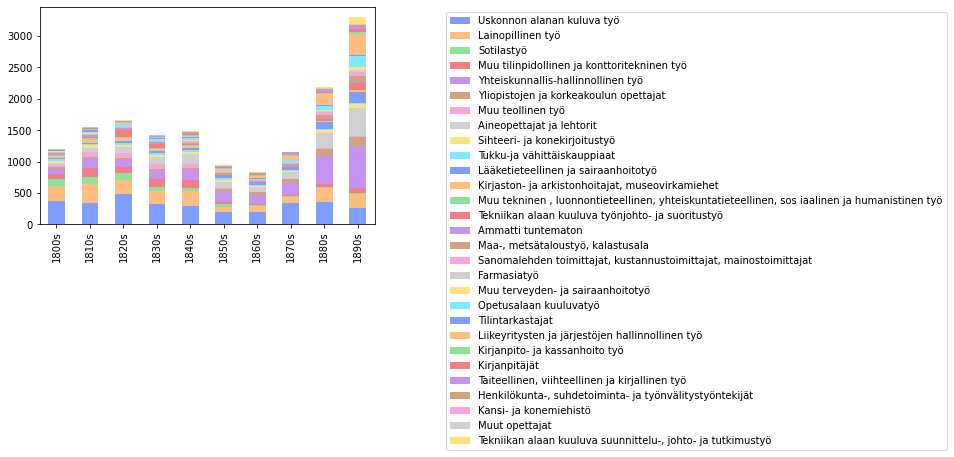

In [16]:
import seaborn as sns
from matplotlib.font_manager import FontProperties   

data=data.T

plt.rcParams['axes.unicode_minus']=False      

sns.set_palette(sns.color_palette('bright'))  

G2=data.plot.bar(stacked=True, alpha=0.5)      

G2.legend(bbox_to_anchor= (1.2,1))

plt.show()

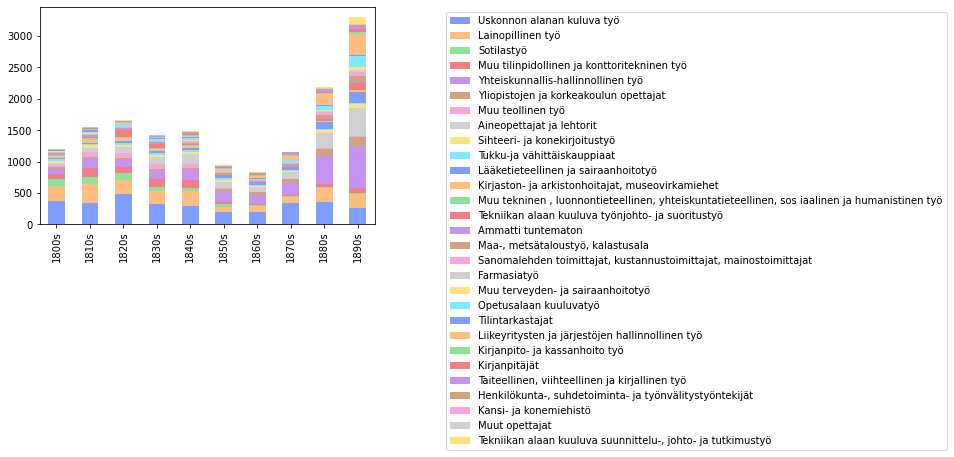

In [17]:
import seaborn as sns
from matplotlib.font_manager import FontProperties   

data=df.T

plt.rcParams['axes.unicode_minus']=False      

sns.set_palette(sns.color_palette('bright'))  

G2=data.plot.bar(stacked=True, alpha=0.5)      

G2.legend(bbox_to_anchor= (1.2,1))

plt.show()

In [18]:
data.to_excel("FinalLbl.xls")
data.to_csv("FinalLbl.csv")